## Hand-written digit recognizer

### Loading Test and Train Data

In [64]:
import numpy as np
X_train = np.load("./train_X.npy")
y_train = np.load("./train_Y.npy")
X_test = np.load("./test_X.npy")

### Plotting labels

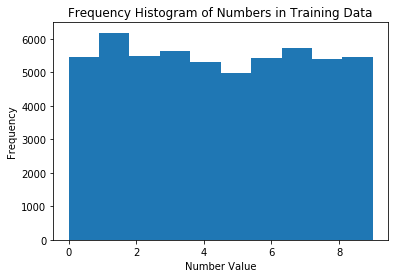

In [65]:

import matplotlib.pyplot as plt
plt.hist(y_train)
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

### Principle Component Analysis

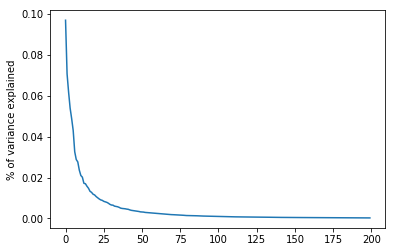

In [66]:
from sklearn import decomposition
## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()

In [67]:
# Plot reaches asymptote at around 100, which is optimal number of PCs to use.
# PCA decomposition with optimal number of PCs

# Decompose train data
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
PCtrain = pca.transform(X_train)

# Decompose test data
PCtest = pca.transform(X_test)

### Training LogisticRegression and SVM

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

lrModel = LogisticRegression()
kmeans = KMeans(5)
svc = SVC()

In [69]:
cross_val_score(estimator=lrModel,X=PCtrain,y=y_train,cv=3,scoring='accuracy')

array([0.90478268, 0.90448917, 0.9106383 ])

In [71]:
cross_val_score(estimator=kmeans,X=PCtrain,y=y_train,cv=3,scoring='accuracy')

array([0.20895604, 0.07549228, 0.02187312])

In [72]:
cross_val_score(estimator=svc,X=PCtrain,y=y_train,cv=3,scoring='accuracy')

array([0.97109669, 0.97098129, 0.97152209])

In [78]:
# Since SVM is giving great accuracy, going ahead with that.

### Generating output file

#### Making prediction using SVM

In [75]:
svc.fit(PCtrain,y_train)
output_label = svc.predict(PCtest)

In [77]:
import pandas as pd
output = pd.DataFrame(output_label,columns = ['Label'])
output.reset_index(inplace=True)
output['index'] = output['index'] + 1
output.rename(columns={'index': 'ImageId'}, inplace=True)
output.to_csv('output.csv', index=False)
output.head()

,ImageId,Label
0,1,9
1,2,9
2,3,8
3,4,0
4,5,1
